In [1]:
import scanpy as sc
import scvi
from matplotlib import rcParams
import matplotlib.pyplot as plt

folder_path = "C:/Users/heung/OneDrive/Documents/scData/16. Siglec-9_GSE235913/sc/"

# Load data

In [5]:
# Read in the data
# adata = sc.read(folder_path + "adata_scVI.h5ad")
adata = sc.read(folder_path + 'adata_annotated.h5ad')
# model = scvi.model.SCVI.load(folder_path + "model/", adata)

---

In [37]:
import numpy as np

<Figure size 500x500 with 0 Axes>

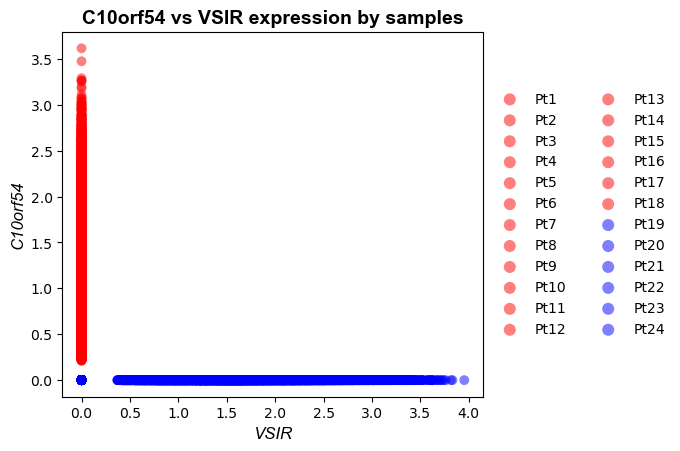

In [131]:
plt.figure(figsize = (5, 5))
ax = sc.pl.scatter(
    adata,
    x = 'VSIR',
    y = 'C10orf54',
    alpha = 0.5,
    size = 200,
    groups = [
        'Pt1', 'Pt2', 'Pt3', 'Pt4', 'Pt5', 'Pt6', 'Pt7', 'Pt8', 'Pt9', 'Pt10',
        'Pt11', 'Pt12', 'Pt13', 'Pt14', 'Pt15', 'Pt16', 'Pt17', 'Pt18', 'Pt19', 'Pt20',
        'Pt21', 'Pt22', 'Pt23', 'Pt24'
    ],
    color = 'sample',
    palette = ['red'] * 18 + ['blue'] * 6,
    title = 'VSIR vs C10orf54 expression by samples',
    show = False
)

from matplotlib.font_manager import FontProperties
font_label = FontProperties()
font_label.set_family('Arial')
font_label.set_size(12)
font_label.set_style('italic')

font_title = FontProperties()
font_title.set_family('Arial')
font_title.set_size(14)
font_title.set_weight('bold')

ax.set_xlabel('VSIR', fontproperties = font_label)
ax.set_ylabel('C10orf54', fontproperties = font_label)
ax.set_title('C10orf54 vs VSIR expression by samples', fontproperties = font_title)
plt.show()

---

c:\Users\heung\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:429: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
c:\Users\heung\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:431: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
c:\Users\heung\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:434: PerformanceWarning: DataFrame is highly fragmented.  This is usually t

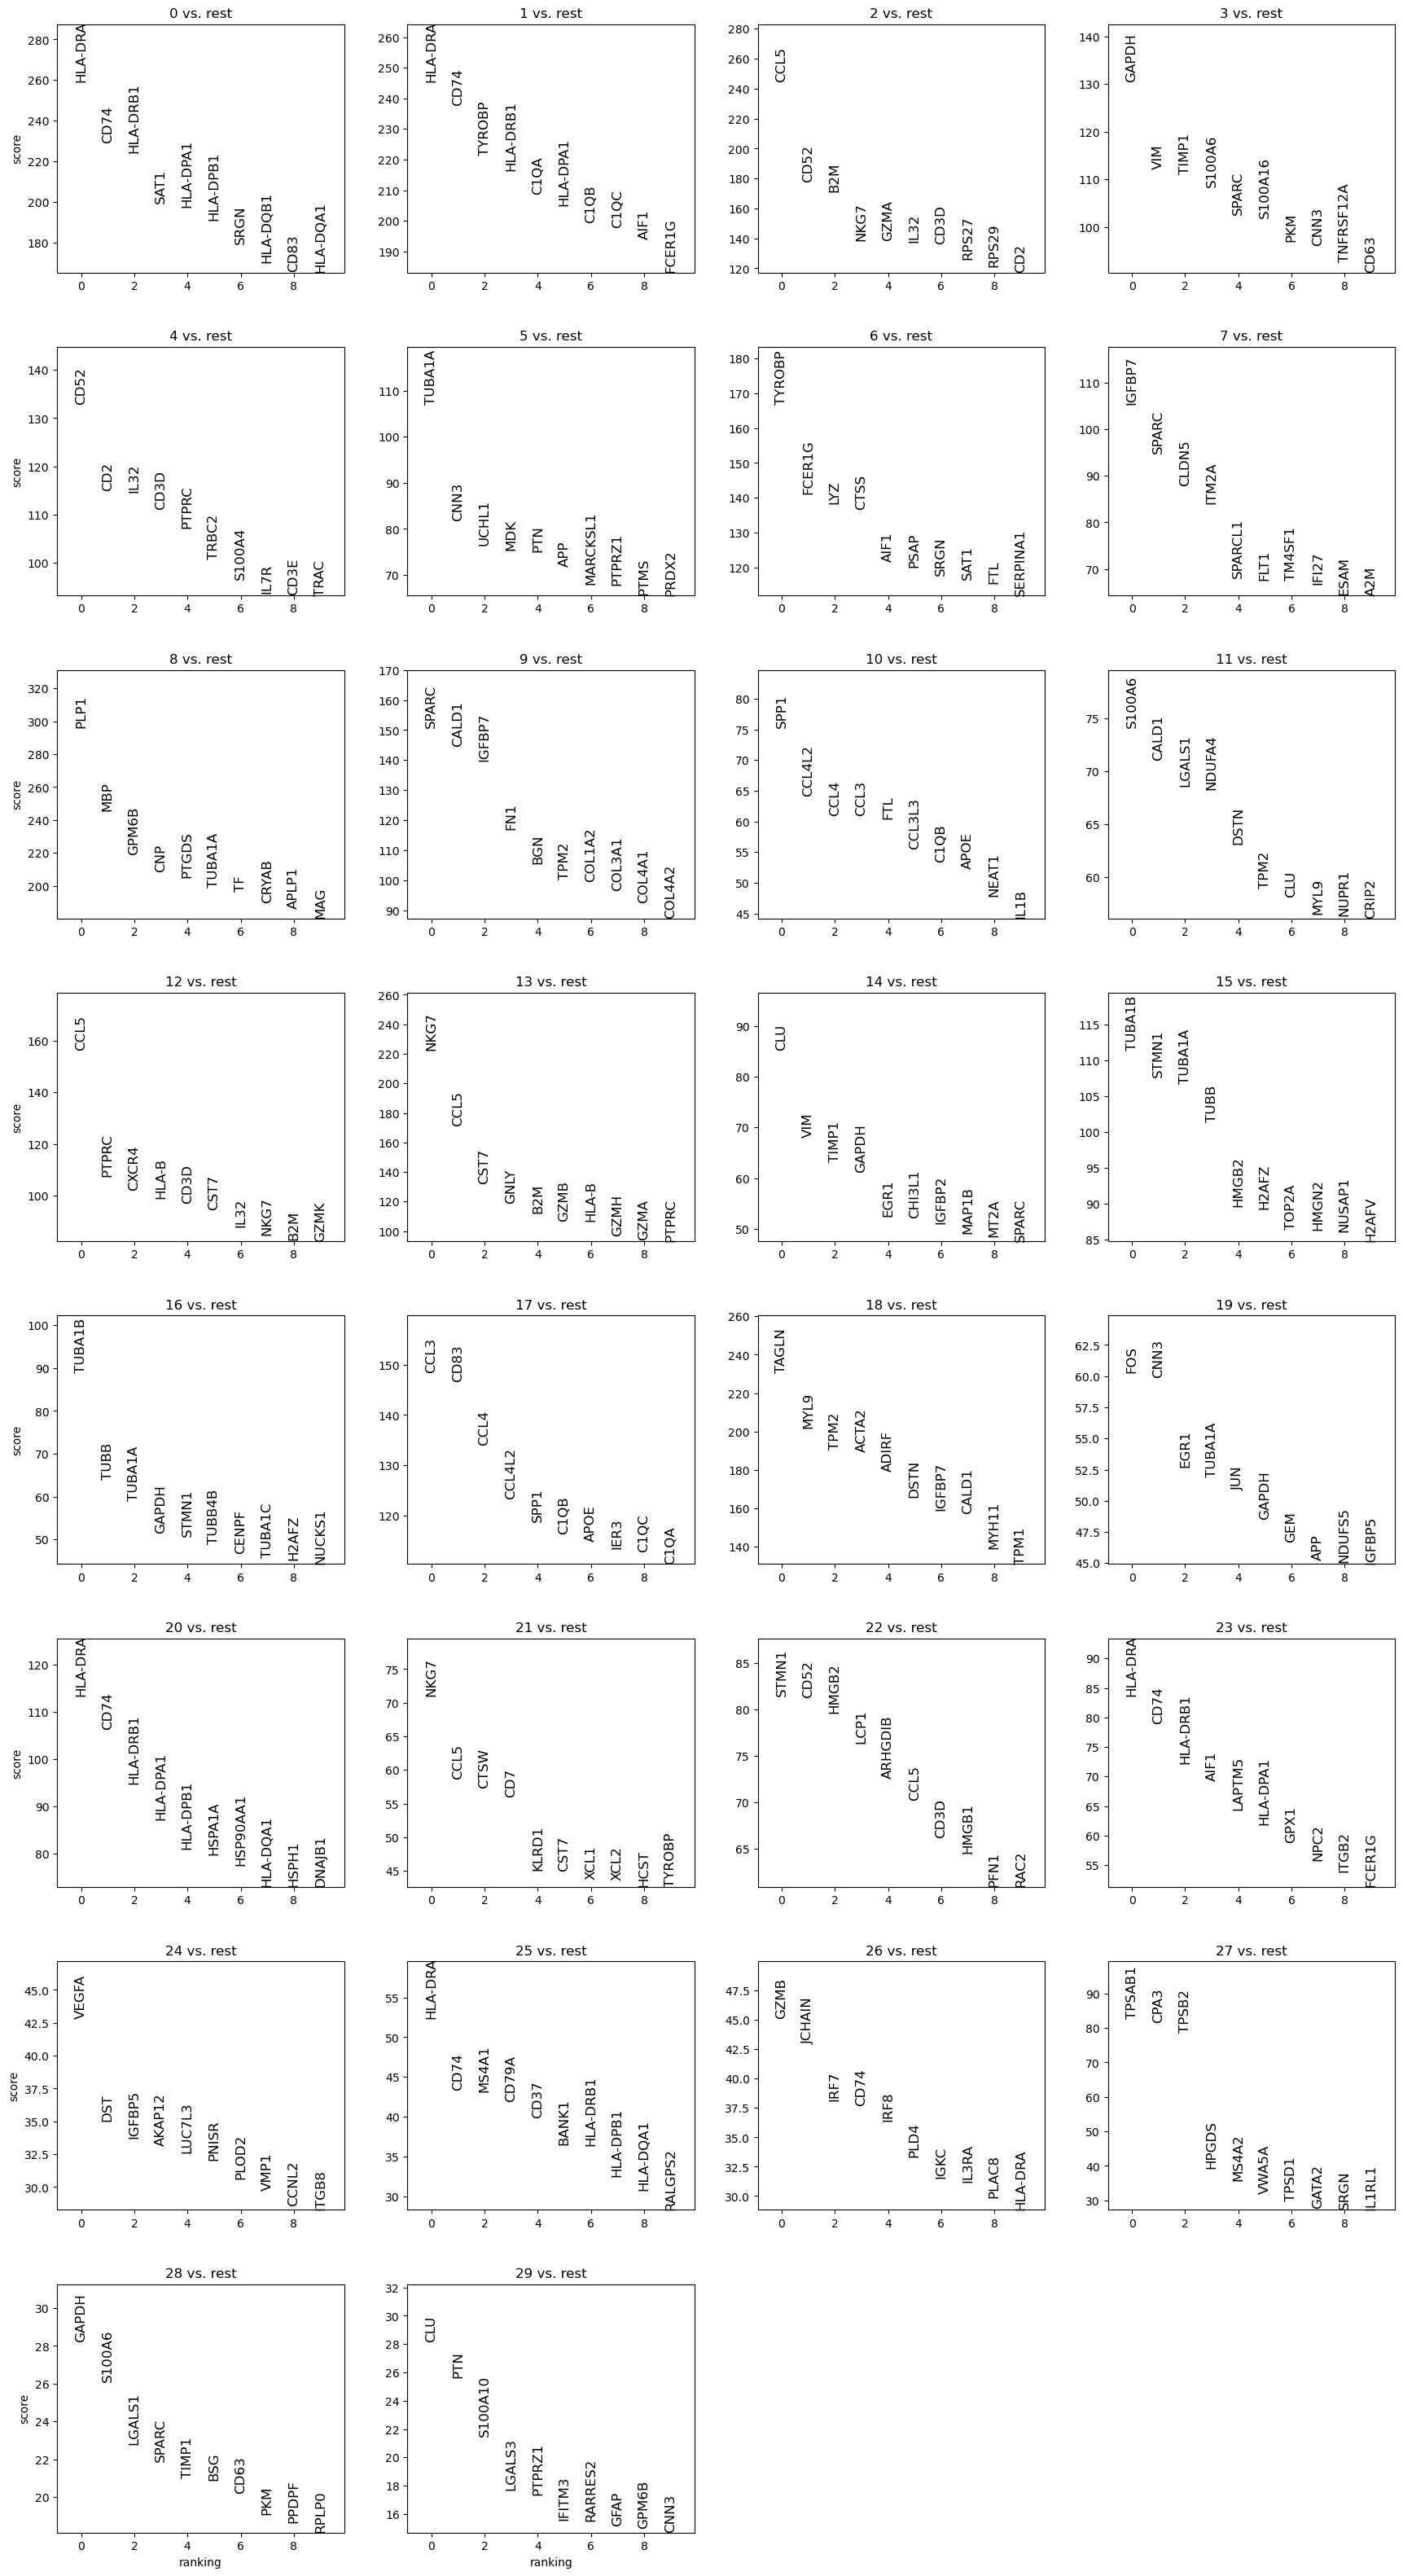

In [38]:
sc.tl.rank_genes_groups(adata, 'leiden')
sc.pl.rank_genes_groups(adata, n_genes = 10, sharey = False, fontsize = 12)

# run time: 27s
# run time: 39s for adata_harmony.h5ad

# Finding markers

In [8]:
# making markers
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > 0.5)]

In [ ]:
# making markers_scvi
# 18개 cluster DEG 찾는데 약 3분 소요
# 94개 sample 찾는데 1시간 반 걸림 -> 안돌림.
markers_scvi = model.differential_expression(groupby = 'leiden')

# markers_scvi filtering
# FDR < 0.05 and logFC > 0.5
markers_scvi = markers_scvi[(markers_scvi['is_de_fdr_0.05']) & (markers_scvi.lfc_mean > .5)]
markers_scvi

FDR (false discovery rate)\
FDR < 0.005 :위양성의 비율이 0.05 미만이다.\
LFC: log fold change

# Sample Annotations

In [43]:
adata

AnnData object with n_obs × n_vars = 126563 × 28847
    obs: 'sample', 'n_genes', 'total_counts', 'pct_counts_mito', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', 'cnv_score'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'umap', 'rank_genes_groups'
    obsm: 'X_pca', 'X_scVI', 'X_umap', '_scvi_extra_continuous_covs'
    varm: 'PCs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

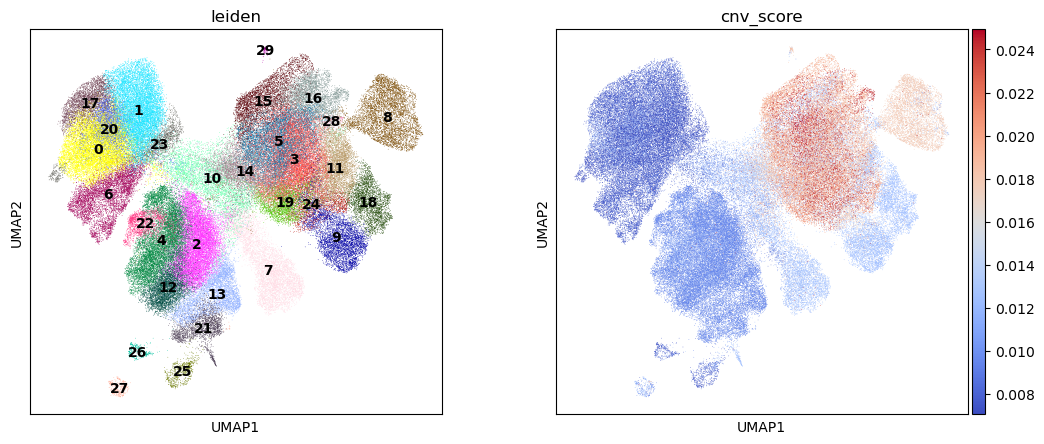

In [48]:
rcParams['figure.figsize'] = (5.3, 5)

sc.pl.umap(
    adata,
    color = ['leiden', 'cnv_score'],
    # frameon = False,
    legend_loc = 'on data',
    layer = 'scvi_normalized',
    # groups = ['Pt']
    color_map = 'coolwarm'
)

In [28]:
sc.tl.leiden(adata, resolution = 1)

C:\Users\heung\AppData\Local\Temp\ipykernel_22616\3164188017.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = 1)


KeyError: 'Could not find key CFAP107 in .var_names or .obs.columns.'

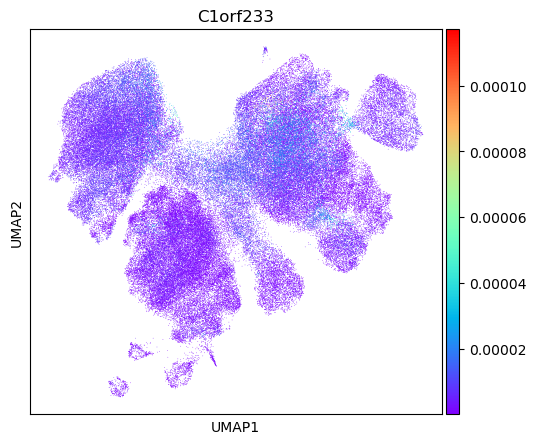

In [15]:
rcParams['figure.figsize'] = (5.3, 5)

sc.pl.umap(
    adata,
    # color = ['EGFR', 'FN1', 'ESAM', 'OLIG2', 'SYP'],
    # color = ['GFAP', 'SLC1A2', 'ACSL6', 'AGT', 'FN1'],
    color = ['C1orf233', 'CFAP107'],
    # frameon = False,
    # legend_loc = 'on data'
    layer = 'scvi_normalized',
    # groups = ['Pt']
    color_map = 'rainbow'
)

# Visualizing UMAP cluster

# Cell type annotation

In [ ]:
for i in range(30):
    print(f'"{i}": "", ')

In [59]:
cell_type = {
"0": "Monocytic cells", 
"1": "Microglia", 
"2": "CD8 T cells", 
"3": "Malignant cells", 
"4": "CD4 T cells", 
"5": "Malignant cells", 
"6": "Monocytic cells", 
"7": "Endothelial cells", # ESAM
"8": "Oligodendrocytes", # OLIG2 
"9": "Fibroblasts", # FN1 
"10": "Monocytic cells", 
"11": "Malignant cells", 
"12": "CD8 T cells", 
"13": "NK cells", 
"14": "Malignant cells", 
"15": "Malignant cells", 
"16": "Malignant cells", 
"17": "Microglia", 
"18": "Fibroblasts",    # 확실하지 않음 
"19": "Malignant cells", 
"20": "Microglia", 
"21": "NK cells", 
"22": "CD8 T cells",    # proliferating CD8
"23": "Monocytic cells", 
"24": "Malignant cells", 
"25": "Etc.", 
"26": "Etc.", 
"27": "Etc.", 
"28": "Malignant cells", 
"29": "Etc.", 

}

## Gene expression in feature plot

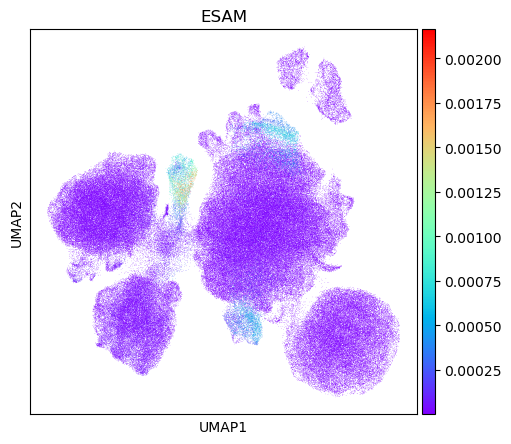

In [7]:
rcParams['figure.figsize'] = (5.5, 5)

sc.pl.umap(
    adata,
    color = ['ESAM'],
    # frameon = False,
    layer = 'scvi_normalized',
    color_map = 'rainbow',
)

In [60]:
adata.obs.head()

,sample,n_genes,total_counts,pct_counts_mito,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,cnv_score
AAACCCAGTGAATGTA-1,Pt1,370,500.0,2.200000,11.400000,0,0,1,0.012811
AAACCCATCCATTCAT-1,Pt1,1068,3611.0,43.035172,3.073941,0,0,0,0.012811
AAACGAAAGCTAGCCC-1,Pt1,523,1103.0,36.536716,2.991840,0,0,12,0.012811
AAACGAAAGCTCTGTA-1,Pt1,654,1564.0,25.831202,2.941176,0,0,0,0.012811
AAACGAATCACGAACT-1,Pt1,414,545.0,0.366972,12.660551,0,0,14,0.012821


## Gene expression by violin plot

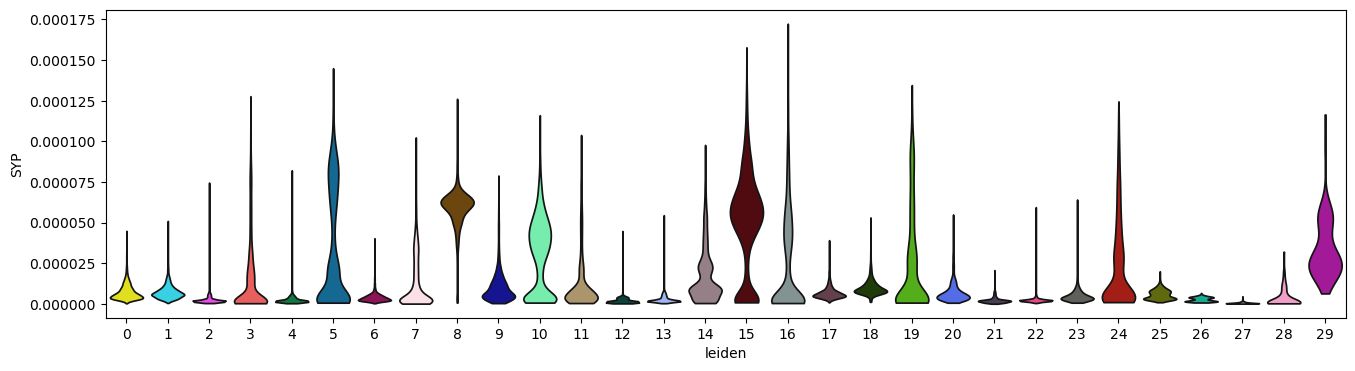

In [61]:
fig, ax = plt.subplots(figsize = (16, 4))

sc.pl.violin(
    adata,
    keys = ['SYP'],
    groupby = 'leiden',
    stripplot = False,
    # jitter = 0.4,
    # size = 0.3,
    layer = 'scvi_normalized', use_raw = False,
    ax = ax,
)

## Search cluster by gene name

In [ ]:
# 유전자를 입력하면 높게 발현하는 cluster를 보여줌
markers[markers.names == 'P2ry12']

## Search genes highly expressed in the cluster

In [ ]:
# cluster를 입력하면 높게 발현하는 유전자를 보여줌
for item in markers_scvi[markers_scvi.group1 == '15'][0:10].index:   # 10 개 까지 보여줌
    print(item)

## Cell type 설정

In [62]:
# Assigning cell types
# adata obs에 cell_type column 추가
adata.obs['cell_type'] = adata.obs.leiden.map(cell_type)
adata.obs.head(5)

,sample,n_genes,total_counts,pct_counts_mito,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,cnv_score,cell_type
AAACCCAGTGAATGTA-1,Pt1,370,500.0,2.200000,11.400000,0,0,1,0.012811,Microglia
AAACCCATCCATTCAT-1,Pt1,1068,3611.0,43.035172,3.073941,0,0,0,0.012811,Monocytic cells
AAACGAAAGCTAGCCC-1,Pt1,523,1103.0,36.536716,2.991840,0,0,12,0.012811,CD8 T cells
AAACGAAAGCTCTGTA-1,Pt1,654,1564.0,25.831202,2.941176,0,0,0,0.012811,Monocytic cells
AAACGAATCACGAACT-1,Pt1,414,545.0,0.366972,12.660551,0,0,14,0.012821,Malignant cells


## Cell type 확인

### UMAP 확인

In [63]:
adata

AnnData object with n_obs × n_vars = 126563 × 28847
    obs: 'sample', 'n_genes', 'total_counts', 'pct_counts_mito', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', 'cnv_score', 'cell_type'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'umap', 'rank_genes_groups'
    obsm: 'X_pca', 'X_scVI', 'X_umap', '_scvi_extra_continuous_covs'
    varm: 'PCs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [4]:
# https://colorswall.com/palette/68
colors = ['#f44336', '#9c27b0', '#3f51b5', '#2196f3', '#009688', '#8bc34a', '#ffc107', '#ff9800', '#795548', '#607d8b']
# colors = colors[::-1]
adata.uns['cell_type_colors'] = colors

In [94]:
import pandas as pd
desired_order = ['Malignant cells', 'Microglia', 'Monocytic cells', 'CD8 T cells', 'CD4 T cells', 'NK cells', 'Oligodendrocytes', 'Endothelial cells', 'Fibroblasts', 'Etc.']
adata.obs['cell_type'] = pd.Categorical(
    values = adata.obs.cell_type, categories = desired_order, ordered = True
)

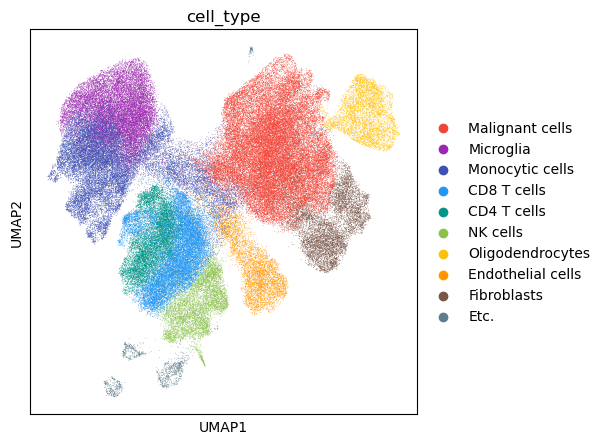

In [5]:
rcParams['figure.figsize'] = (5, 5)
sc.pl.umap(
    adata,
    color = ['cell_type'],
    # frameon = False,
    # legend_loc = 'on data',
    # palette = sc.pl.palettes.vega_10
)

### Violin plot gene expression 확인

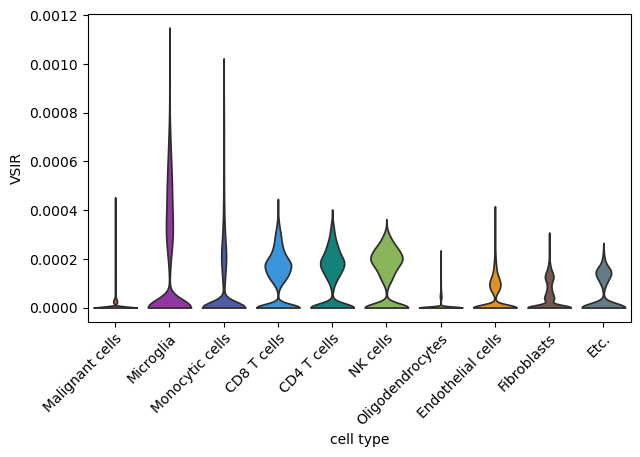

In [19]:
fig, ax = plt.subplots(figsize = (7, 4))

sc.pl.violin(
    adata,
    keys = ['VSIR'],
    groupby = 'cell_type',
    stripplot = False,
    # jitter = 0.4,
    # size = 0.3,
    layer = 'scvi_normalized', use_raw = False,
    ax = ax,
    show = False
)

plt.xticks(rotation = 45, rotation_mode = 'anchor', ha = 'right')   # x 축 레이블 회전
plt.show()

### Dot plot

In [122]:
# marker_genes_dict = {
#     'Malignant cells': ['EGFR'],
#     'Microglia': ['TMEM119'],
#     'Monocytic cells': ['CST3'],
#     'CD8 T cells': ['CD3E', 'CD8A'],
#     'CD4 T cells': ['CD4'],
#     'NK cells': ['NCR1'],
#     'Oligodendrocytes': ['OLIG2'],
#     'Endothelial cells': ['ESAM'],
#     'Fibroblasts': ['FN1'],
#     # 'Etc.': ['GAPDH'],
# }
marker_genes_dict = {
    'Oligodendrocytes': ['OLIG2'],
    'Endothelial cells': ['ESAM'],
    'Malignant cells': ['TP53'],
    'Fibroblasts': ['FN1'],
    'Microglia': ['TMEM119'],
    'Monocytic cells': ['HLA-DRA'],
    'NK cells': ['NCR1'],
    'CD8 T cells': ['CD3E', 'CD8A'],
    'CD4 T cells': ['CD4'],
    # 'Etc.': ['GAPDH'],
}

categories: Malignant cells, Microglia, Monocytic cells, etc.
var_group_labels: Oligodendrocytes, Endothelial cells, Malignant cells, etc.


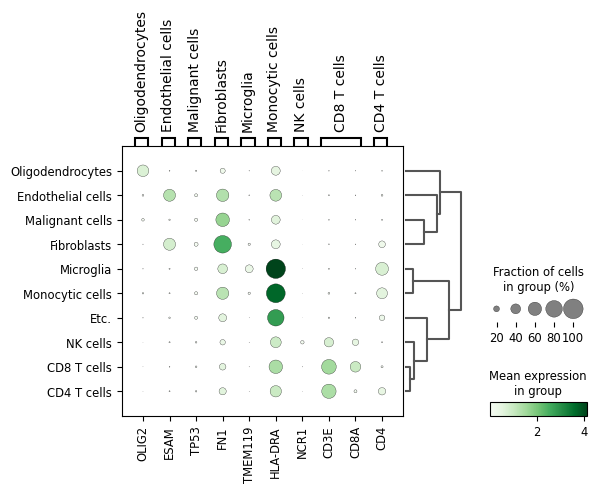

In [123]:
# sc.tl.dendrogram(adata, groupby = 'cell_type')    # dot plot 한번 그린 후 cell type annotation 바꾸면 이거 돌려줘야 함

sc.pl.dotplot(
    adata,
    marker_genes_dict,
    groupby = 'cell_type',
    dendrogram = True,
    # var_group_rotation = 45,
    cmap = 'Greens',
)

# Sample annotation 추가

In [124]:
import pandas as pd

# 엑셀 파일 로드
df_excel = pd.read_excel(folder_path + 'sample_annot.xlsx')
df_excel.head()

,sample,Age,Gender,WHO Classification,Treatment,Neo therapy responsiveness
0,Pt1,46,Male,4,ND,NaN
1,Pt2,39,Male,4,Neo,Non-responder
2,Pt3,7,Female,4,Rec,NaN
3,Pt4,35,Female,4,ND,NaN
4,Pt5,38,Female,4,ND,NaN


In [128]:
# 엑셀 파일을 딕셔너리로 변환
sample_to_age = df_excel.set_index('sample')['Age'].to_dict()
sample_to_gender = df_excel.set_index('sample')['Gender'].to_dict()
sample_to_grade = df_excel.set_index('sample')['WHO Classification'].to_dict()
sample_to_treatment = df_excel.set_index('sample')['Treatment'].to_dict()
sample_to_responsiveness = df_excel.set_index('sample')['Neo therapy responsiveness'].to_dict()

In [129]:
adata.obs['age'] = adata.obs['sample'].map(sample_to_age).fillna('Unknown')
adata.obs['gender'] = adata.obs['sample'].map(sample_to_gender).fillna('Unknown')
adata.obs['tumor_grade'] = adata.obs['sample'].map(sample_to_grade).fillna('Unknown')
adata.obs['treatment'] = adata.obs['sample'].map(sample_to_treatment).fillna('Unknown')
adata.obs['responsiveness'] = adata.obs['sample'].map(sample_to_responsiveness).fillna('Unknown')

In [130]:
adata.obs.head()

,sample,n_genes,total_counts,pct_counts_mito,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,cnv_score,cell_type,age,gender,tumor_grade,treatment,responsiveness
AAACCCAGTGAATGTA-1,Pt1,370,500.0,2.200000,11.400000,0,0,1,0.012811,Microglia,46,Male,4,ND,Unknown
AAACCCATCCATTCAT-1,Pt1,1068,3611.0,43.035172,3.073941,0,0,0,0.012811,Monocytic cells,46,Male,4,ND,Unknown
AAACGAAAGCTAGCCC-1,Pt1,523,1103.0,36.536716,2.991840,0,0,12,0.012811,CD8 T cells,46,Male,4,ND,Unknown
AAACGAAAGCTCTGTA-1,Pt1,654,1564.0,25.831202,2.941176,0,0,0,0.012811,Monocytic cells,46,Male,4,ND,Unknown
AAACGAATCACGAACT-1,Pt1,414,545.0,0.366972,12.660551,0,0,14,0.012821,Malignant cells,46,Male,4,ND,Unknown


# Save

In [20]:
# adata.uns['scvi_markers'] = markers_scvi
adata.uns['markers'] = markers

adata.write_h5ad(folder_path + "adata_annotated.h5ad")
# 18GB

---------------------